In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import ArrowStyle, Rectangle
import pandas as pd
import numpy as np
import math

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [2]:
model_name = ['OPT-1.3B', 'Phi-2B', 'Llama-2-7B', 'Llama-2-13B']
mem_label  = ['Weight', 'Activation']

mem_downstream  = [
    [2.44177,  4.93164,  12.30664, 23.93798],
    [0.26128,  0.41895,  0.73010,  1.13342 ],
]

mem_generation  = [
    [26.85949, 54.24804, 135.3730, 263.3178],
    [0.74847,  1.23029,  2.03059,  3.16515 ],
]

mem_footprint = [mem_downstream, mem_generation]

## Memory Footprint

In [3]:
linestyle   = 'solid'
markersize  = 10
alpha       = 1
tick_size   = 9.5
label_size  = 10.5
legend_size = 9
title_size  = 10
text_size   = 8

# bar setting
width      = 0.055  # the width of each bar
edgewidth  = 0.8 # the edge width of each bar
hatchwidth = 0.5 # the edge width of each bar
spacing    = 0.14 # spacing between each model bar
distance   = 0.0  # spacing between every two bars of the same model
x          = np.arange(len(model_name))*spacing # the label locations

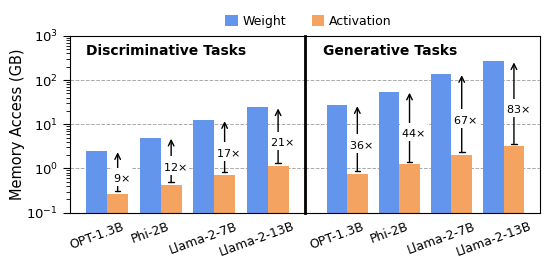

In [4]:
figwidth    = 5.6
figheight   = 2.6

y_title_pad = 0
title_yloc  = 0.89
rotation = 20
x_margin = 0.08

############# Arrow Style #############
arrowstyle = ArrowStyle.CurveB(head_length=0.4, head_width=0.2, widthA=0.2, widthB=1.0, lengthA=0., lengthB=0., angleA=0, angleB=0, scaleA=None, scaleB=None)
arrowstyle._beginarrow_head = False
arrowstyle._beginarrow_bracket = True
#######################################

f, ax = plt.subplots(1, 2)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f_list = [i for i in range(2)]
color_list = ['cornflowerblue', 'sandybrown']

arrow_xloc = x + width + distance/2

for i in range(2):
    for j in range(2):
        f_list[j] = ax[i].bar(x + j*width + distance*j/2, mem_footprint[i][j], width, color=color_list[j],)

    y_low = 1E-1
    y_up  = 1000 + 0.01
    y_lim = y_up - 0.01
    ax[i].set_ylim(y_low, y_lim)
    ax[i].set_yscale("log")
    ax[i].set_yticks([1E-1, 1E0, 1E1, 1E2, 1E3])
    
    ax[i].margins(x=x_margin)
    ax[i].set_xticks(x,)
    ax[i].set_xticklabels(model_name, rotation=rotation)
    ax[i].tick_params(axis='y', which='major', labelsize=tick_size, length=5)
    ax[i].tick_params(axis='y', which='minor', length=3)
    ax[i].tick_params(axis='x', which='major', labelsize=tick_size-0.5, pad=5, length=0)
    
    if i == 0:
        ax[i].set_ylabel('Memory Access (GB)', fontsize=label_size, labelpad=1)
        ax[i].set_title('Discriminative Tasks', fontsize=title_size, weight='bold', x=0.41, y=title_yloc, pad=y_title_pad)
        ax[i].spines['right'].set_visible(False)
        xlim = ax[i].get_xlim()
    if i == 1:
        ax[i].set_xlim(xlim[0]-0.015, xlim[1])
        ax[i].set_title('Generative Tasks', fontsize=title_size, weight='bold', x=0.36, y=title_yloc, pad=y_title_pad)
        ax[i].tick_params(left=False, which='both')
        ax[i].yaxis.set_tick_params(labelleft=False)
        ax[i].spines['left'].set_visible(True)
        ax[i].spines['left'].set_linewidth(2)

    ax[i].grid(True, linestyle='dashed', axis='y', zorder=1000, color='darkgrey', linewidth=0.7)
    ax[i].set_axisbelow(True)

    for j in range(len(model_name)):
        begin_x = arrow_xloc[j]
        begin_y = mem_footprint[i][1][j]
        end_x   = arrow_xloc[j]
        end_y   = mem_footprint[i][0][j] * 1.1
        text_x  = begin_x + 0.01
        text_y  = math.exp((math.log(begin_y) + math.log(end_y)) / 2)
        mem_ratio = round(mem_footprint[i][0][j] / mem_footprint[i][1][j])
        ax[i].annotate(text='', xytext=(begin_x, begin_y), xy=(end_x, end_y), arrowprops=dict(arrowstyle=arrowstyle))
        txt = ax[i].annotate(text=str(mem_ratio) + r'$\times$', xy=(text_x, text_y), fontsize=text_size,
                             bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=1.5), 
                             horizontalalignment='center', verticalalignment='top')

        ########## Customize text bbox ##########
        bbox = txt.get_window_extent().transformed(ax[i].transData.inverted())
        xmin = bbox.xmin
        xmax = bbox.xmax
        ymin = bbox.ymin
        ymax = bbox.ymax
        dx = xmax-xmin
        dy = ymax-ymin
        extra = 0.2

        # The bounding box vals can be tweaked manually here.
        rect = Rectangle((xmin, ymin-dy*extra), dx, dy*(extra*4 + 1), fc='w', zorder=3)
        ax[i].add_patch(rect)
        ########################################
        txt = ax[i].annotate(text=str(mem_ratio) + r'$\times$', xy=(text_x, text_y), fontsize=text_size,
                             horizontalalignment='center', verticalalignment='top')

f.legend(f_list, ["Weight", "Activation"], 
        loc='upper center', bbox_to_anchor=[0.56, 1.04], 
        fontsize=legend_size, ncol=5, columnspacing=2, frameon=False, handlelength=1, handleheight=1, handletextpad=0.4)

plt.tight_layout(h_pad=0, w_pad=0)
f.savefig('mem_footprint.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=200, pad_inches=0.1)

In [15]:
values = [-5, -4, -2, -1, 0, 1, 2, 4]

In [16]:
np.std(values)

2.8256636388643286